polynomial  training error  0.008166666666666655
polynomial  testing error 0.010700000000000043
RBF  training error  0.008166666666666655
RBF  testing error 0.010700000000000043


'\nC_range = np.logspace(-2, 10, 13)\nprint C_range\ngamma_range = np.logspace(-9, 3, 13)\nprint gamma_range\nparam_grid = dict(gamma=gamma_range, C=C_range)\ncv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)\ngrid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)\ngrid.fit(x_train, y_train)\nprint("The best parameters for RBF kernel  are %s with a score of %0.2f"\n      % (grid.best_params_, grid.best_score_))\n\n#boundary for gamm and c parameter\nC_2d_range = [1e-2, 1, 1e2]\ngamma_2d_range = [1e-1, 1, 1e1]\nclassifiers = []\n#fit all model with different parameter\n\nfor C in C_2d_range:\n    for gamma in gamma_2d_range:\n        rbf_svm = svm.SVC(C=C, gamma=gamma)\n        rbf_svm.fit(x_test, y_test)\n        classifiers.append((C, gamma, rbf_svm))\n        print  rbf_svm.score(x_test, y_test)\n# Visualization\n# draw visualization of parameter effects\nplt.figure(figsize=(8, 6))\nxx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))\nfor (k

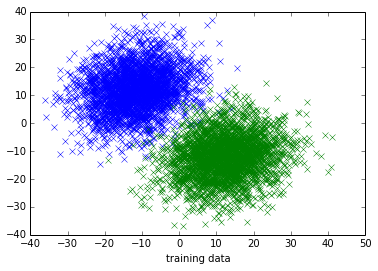

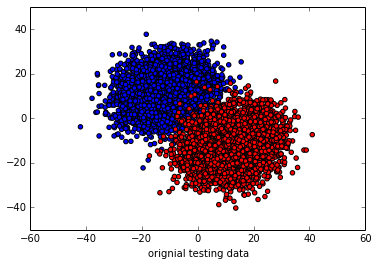

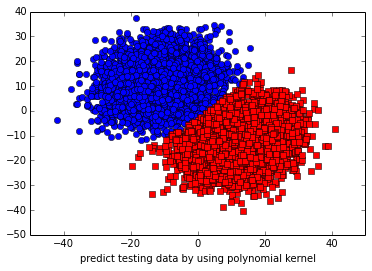

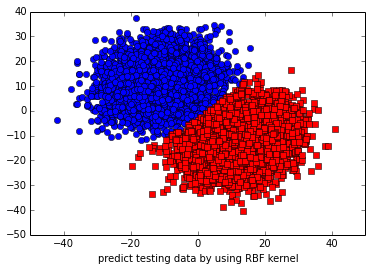

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
#generate 2D train data
N_train=3000
mean1= [-12, 12]
cov1= [[60, 10], [10, 60]]  # diagonal covariance
x1, y1 = np.random.multivariate_normal(mean1, cov1, N_train).T
mean2 = [12, -12]
cov2 = [[60, 10], [10, 60]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, N_train).T
plt.plot(x1, y1, 'x')
plt.plot(x2, y2, 'x')
plt.xlabel('training data')

#conver two classfiy data into standard matrial train data
x_train = np.row_stack(((np.column_stack((x1, y1))),(np.column_stack((x2, y2)))))
y_train = (np.row_stack(((np.zeros((N_train,1))),(np.ones((N_train,1)))))).ravel()


#generate testing data
N_test=5000
mean3= [-12, 12]
cov3= [[60, 10], [10, 60]]  # diagonal covariance
x3, y3 = np.random.multivariate_normal(mean3, cov3,N_test).T

mean4= [12, -12]
cov4= [[60, 10], [10, 60]]  # diagonal covariance
x4, y4 = np.random.multivariate_normal(mean4, cov4,N_test).T

#conver two classfiy data into standard matrail train data
x_test = np.row_stack(((np.column_stack((x3, y3))),(np.column_stack((x4, y4)))))
y_test = (np.row_stack(((np.zeros((N_test,1))),(np.ones((N_test,1)))))).ravel()

plt.figure()
plt.scatter(x3, y3, c='b')
plt.scatter(x4, y4, c = 'r')
plt.xlabel('orignial testing data')


#SVM with polynomial
pol_svc=svm.SVC(kernel='poly')
pol_svc.fit(x_train,y_train)
pol_train_error=1-pol_svc.score(x_train,y_train)
pol_test_error=1-pol_svc.score(x_test,y_test)

#predict test data 
y_predict=pol_svc.predict(x_test)

#plot results
plt.figure()
plt.plot(x_test[np.where(y_predict==0)[0], 0], x_test[np.where(y_predict==0)[0], 1], 'o')
plt.plot(x_test[np.where(y_predict==1)[0], 0], x_test[np.where(y_predict==1)[0], 1], 's', c = 'r')
plt.xlabel('predict testing data by using polynomial kernel')

print "polynomial  training error ",pol_train_error
print "polynomial  testing error",pol_test_error

#SVM with RBF
rbf1_svc=svm.SVC(kernel='poly')
rbf1_svc.fit(x_train,y_train)
rbf1_train_error=1-pol_svc.score(x_train,y_train)
rbf1_test_error=1-pol_svc.score(x_test,y_test)

#predict test data 
y_predict=rbf1_svc.predict(x_test)
#plot results
plt.figure()
plt.plot(x_test[np.where(y_predict==0)[0], 0], x_test[np.where(y_predict==0)[0], 1], 'o')
plt.plot(x_test[np.where(y_predict==1)[0], 0], x_test[np.where(y_predict==1)[0], 1], 's', c = 'r')
plt.xlabel('predict testing data by using RBF kernel')

print "RBF  training error ",pol_train_error
print "RBF  testing error",pol_test_error

# following  some of code implement from http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py
# find best parameter

C_range = np.logspace(-2, 10, 13)
print C_range
gamma_range = np.logspace(-9, 3, 13)
print gamma_range
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x_train, y_train)
print("The best parameters for RBF kernel  are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

#boundary for gamm and c parameter
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
#fit all model with different parameter

for C in C_2d_range:
    for gamma in gamma_2d_range:
        rbf_svm = svm.SVC(C=C, gamma=gamma)
        rbf_svm.fit(x_test, y_test)
        classifiers.append((C, gamma, rbf_svm))
        print  rbf_svm.score(x_test, y_test)
# Visualization
# draw visualization of parameter effects
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, rbf_svm)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

print "enter parameter........fit"
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# Draw heatmap of the validation accuracy as a function of gamma and C
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy ')
plt.show()